<a href="https://colab.research.google.com/github/scottthomaswx/Marine-Obs-Map/blob/main/MarineObsMap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install cartopy
!pip install matplotlib
!pip install siphon
!pip install pandas
!pip install geopandas
!pip install metpy

import cartopy.crs as ccrs
import cartopy.feature as cfeat
import matplotlib.pyplot as plt
from siphon.simplewebservice.ndbc import NDBC
import pandas as pd
import geopandas
from metpy.plots import PlotGeometry
from metpy.units import units
import metpy.calc as mpcalc
import matplotlib as mpl

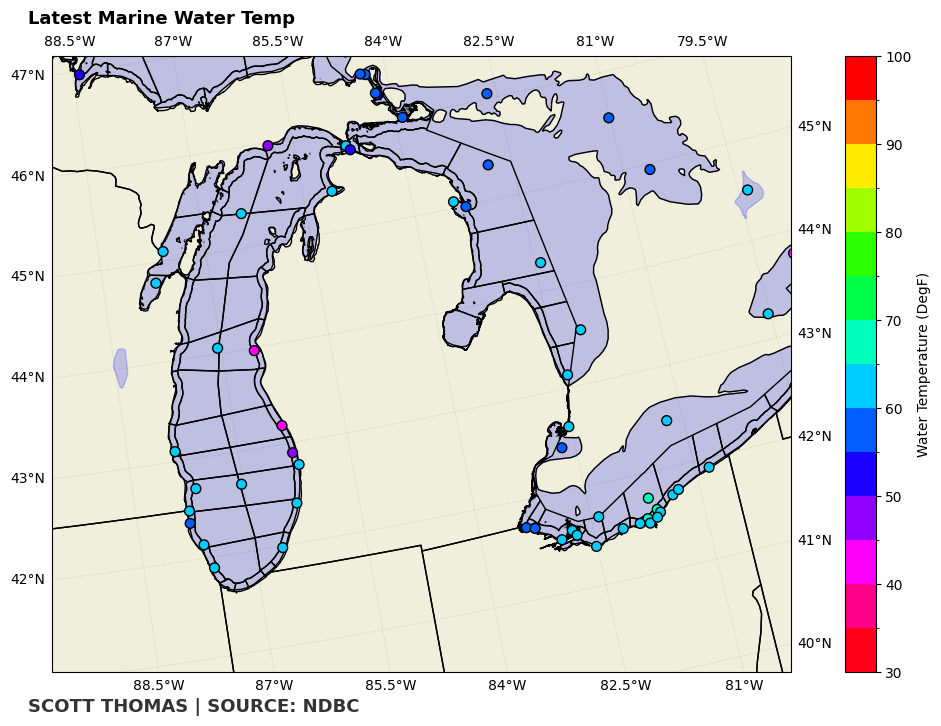

In [19]:
# @markdown ## Check what parameter you wish to plot
# @markdown ### Not all stations will have all variables

#User Selects What Obs They Want To Plot

Wave_Heigt = False # @param {type:"boolean"}
Wind_Speed = False # @param {type:"boolean"}
Wind_Gusts = False # @param {type:"boolean"}
Air_Temp = False # @param {type:"boolean"}
Water_Temp = True # @param {type:"boolean"}

#Pull Latest NDBC Obs
df = NDBC.latest_observations()

#Convert to Imperial Units
df['wave_height_ft'] = (df.wave_height.values*units.meters).to('feet')
df['wind_speed_kts'] = (df.wind_speed.values*units.meters/units.second).to('knots')
df['wind_gust_kts'] = (df.wind_gust.values*units.meters/units.second).to('knots')
df['air_temp_degf'] = (df.air_temperature.values*units.degC).to('degF')
df['water_temp_degf'] = (df.water_temperature.values*units.degC).to('degF')

#Set Projection
proj = ccrs.LambertConformal(central_latitude=45., central_longitude=-100.,
                             standard_parallels=[30, 60])
#Add Marine Zones for Great Lakes
mzone_file = geopandas.read_file('/vsicurl/https://github.com/scottthomaswx/Marine-Obs-Map/raw/main/mz19se23.shp')
MarZoneMap = PlotGeometry()
MarZoneMap.geometry = mzone_file['geometry']

fig = plt.figure(figsize=(14, 8))
ax = plt.axes(projection=proj)
ax.coastlines('50m', edgecolor='black')
ax.add_feature(cfeat.OCEAN.with_scale('50m'))
ax.add_feature(cfeat.LAND.with_scale('50m'))
ax.set_extent([-89, -80, 41, 46], ccrs.PlateCarree())
lake = cfeat.NaturalEarthFeature('physical', 'lakes', '50m', edgecolor='blue', facecolor='blue', alpha=0.2, zorder = 1)
ax.add_geometries(MarZoneMap.geometry, crs = ccrs.PlateCarree(), facecolor = 'none', edgecolor = 'black',  zorder=2)

if Wave_Heigt == True:

  df.dropna(subset=['wave_height_ft'], inplace=True)

  #Query By Wave Height

  NoneWave =  df.query('wave_height_ft < 4')
  SCY_Wave = df.query('wave_height_ft >= 4 and  wave_height_ft < 8')
  F8_Wave = df.query('wave_height_ft >= 8 and  wave_height_ft < 10')
  F10_Wave = df.query('wave_height_ft >= 10 and  wave_height_ft < 15')
  F15_Wave = df.query('wave_height_ft >= 15 and  wave_height_ft < 20')
  F20_Wave =df.query('wave_height_ft >= 20')

  ax.scatter(NoneWave['longitude'], NoneWave['latitude'], c='green', label = '< 4 ft',
            transform=ccrs.PlateCarree(), s = 50, zorder = 999, edgecolor = 'black')

  ax.scatter(SCY_Wave['longitude'], SCY_Wave['latitude'], c='darkgoldenrod', label = '4-8 ft (SC.Y)',
            transform=ccrs.PlateCarree(), s = 50,zorder = 999, edgecolor = 'black')

  ax.scatter(F8_Wave['longitude'], F8_Wave['latitude'], c='orange', label = '8-10 ft',
            transform=ccrs.PlateCarree(), s = 50, zorder = 999, edgecolor = 'black')

  ax.scatter(F10_Wave['longitude'], F10_Wave['latitude'], c='red', label = '10-15 ft',
            transform=ccrs.PlateCarree(), s = 50, zorder = 999, edgecolor = 'black')

  ax.scatter(F15_Wave['longitude'], F15_Wave['latitude'], c='hotpink', label = '15-20 ft',
            transform=ccrs.PlateCarree(), s = 50, zorder = 999, edgecolor = 'black')

  ax.scatter(F20_Wave['longitude'], F20_Wave['latitude'], c='purple', label = '20+ ft',
            transform=ccrs.PlateCarree(), s = 50, zorder = 999, edgecolor = 'black')

  plt.figtext(0.22, 0.85, f'Latest Wave Heights', ha='left', weight='bold', fontsize=13)
  plt.figtext(0.22, 0.13, f'SCOTT THOMAS | SOURCE: NDBC', weight='bold', color='black', fontsize=13, ha='left', alpha=0.8)

  box = ax.get_position()
  ax.set_position([box.x0, box.y0, box.width * 0.8, box .height])
  ax.legend(loc='center left', bbox_to_anchor=(1.10, 0.5),
      ncol=1, fancybox=True, shadow=True)

elif Wind_Speed == True:

  df.dropna(subset=['wind_speed_kts'], inplace=True)

  #Query By Wind Speed

  NoneWind =  df.query('wind_speed_kts < 22')
  SCY_Wind = df.query('wind_speed_kts >= 22 and  wind_speed_kts < 34')
  GLW_Wind = df.query('wind_speed_kts >= 34 and  wind_speed_kts < 48')
  SRW_Wind = df.query('wind_speed_kts >= 48 and  wind_speed_kts < 64')
  HFW_Wind = df.query('wind_speed_kts >= 64')

  NoneU, NoneV = mpcalc.wind_components((NoneWind['wind_speed_kts'].values * units ('knots')), (NoneWind['wind_direction'].values * units ('deg')))
  SCYU, SCYV = mpcalc.wind_components((SCY_Wind['wind_speed_kts'].values * units ('knots')), (SCY_Wind['wind_direction'].values * units ('deg')))
  GLWU, GLWV = mpcalc.wind_components((GLW_Wind['wind_speed_kts'].values * units ('knots')), (GLW_Wind['wind_direction'].values * units ('deg')))
  SRWU, SRWV = mpcalc.wind_components((SRW_Wind['wind_speed_kts'].values * units ('knots')), (SRW_Wind['wind_direction'].values * units ('deg')))
  HFWU, HFWV = mpcalc.wind_components((HFW_Wind['wind_speed_kts'].values * units ('knots')), (HFW_Wind['wind_direction'].values * units ('deg')))

  ax.barbs(NoneWind['longitude'], NoneWind['latitude'], NoneU, NoneV, barbcolor='green', label = 'None',
            transform=ccrs.PlateCarree(),zorder = 999, linewidth=2)

  ax.barbs(SCY_Wind['longitude'], SCY_Wind['latitude'], SCYU, SCYV, barbcolor='darkgoldenrod', label = 'SC.Y',
            transform=ccrs.PlateCarree(), zorder = 999, linewidth=2)

  ax.barbs(GLW_Wind['longitude'], GLW_Wind['latitude'], GLWU, GLWV, barbcolor='orange', label = 'GL.W/TS.W',
            transform=ccrs.PlateCarree(), zorder = 999, linewidth=2)

  ax.barbs(SRW_Wind['longitude'], SRW_Wind['latitude'], SRWU, SRWV, barbcolor='red', label = 'SR.W/TS.W',
            transform=ccrs.PlateCarree(), zorder = 999, linewidth=2)

  ax.barbs(HFW_Wind['longitude'], HFW_Wind['latitude'], HFWU, HFWV, barbcolor='hotpink', label = 'HF.W/HU.W',
            transform=ccrs.PlateCarree(), zorder = 999, linewidth=2)


  plt.figtext(0.22, 0.85, f'Latest Marine Winds', ha='left', weight='bold', fontsize=13)
  plt.figtext(0.22, 0.13, f'SCOTT THOMAS | SOURCE: NDBC', weight='bold', color='black', fontsize=13, ha='left', alpha=0.8)

  box = ax.get_position()
  ax.set_position([box.x0, box.y0, box.width * 0.8, box .height])
  ax.legend(loc='center left', bbox_to_anchor=(1.10, 0.5),
      ncol=1, fancybox=True, shadow=True)
elif Wind_Gusts == True:

  df.dropna(subset=['wind_gust_kts'], inplace=True)

  #Query By Wind Gusts

  NoneGusts =  df.query('wind_gust_kts < 22')
  SCY_Gusts = df.query('wind_gust_kts >= 22 and  wind_gust_kts < 34')
  GLW_Gusts = df.query('wind_gust_kts >= 34 and  wind_gust_kts < 48')
  SRW_Gusts = df.query('wind_gust_kts >= 48 and  wind_gust_kts < 64')
  HFW_Gusts = df.query('wind_gust_kts >= 64')

  NoneU, NoneV = mpcalc.wind_components((NoneGusts['wind_gust_kts'].values * units ('knots')), (NoneGusts['wind_direction'].values * units ('deg')))
  SCYU, SCYV = mpcalc.wind_components((SCY_Gusts['wind_gust_kts'].values * units ('knots')), (SCY_Gusts['wind_direction'].values * units ('deg')))
  GLWU, GLWV = mpcalc.wind_components((GLW_Gusts['wind_gust_kts'].values * units ('knots')), (GLW_Gusts['wind_direction'].values * units ('deg')))
  SRWU, SRWV = mpcalc.wind_components((SRW_Gusts['wind_gust_kts'].values * units ('knots')), (SRW_Gusts['wind_direction'].values * units ('deg')))
  HFWU, HFWV = mpcalc.wind_components((HFW_Gusts['wind_gust_kts'].values * units ('knots')), (HFW_Gusts['wind_direction'].values * units ('deg')))

  ax.barbs(NoneGusts['longitude'], NoneGusts['latitude'], NoneU, NoneV, barbcolor='green', label = 'None',
            transform=ccrs.PlateCarree(),zorder = 999, linewidth=2)

  ax.barbs(SCY_Gusts['longitude'], SCY_Gusts['latitude'], SCYU, SCYV, barbcolor='darkgoldenrod', label = 'SC.Y',
            transform=ccrs.PlateCarree(), zorder = 999, linewidth=2)

  ax.barbs(GLW_Gusts['longitude'], GLW_Gusts['latitude'], GLWU, GLWV, barbcolor='orange', label = 'GL.W/TS.W',
            transform=ccrs.PlateCarree(), zorder = 999, linewidth=2)

  ax.barbs(SRW_Gusts['longitude'], SRW_Gusts['latitude'], SRWU, SRWV, barbcolor='red', label = 'SR.W/TS.W',
            transform=ccrs.PlateCarree(), zorder = 999, linewidth=2)

  ax.barbs(HFW_Gusts['longitude'], HFW_Gusts['latitude'], HFWU, HFWV, barbcolor='hotpink', label = 'HF.W/HU.W',
            transform=ccrs.PlateCarree(), zorder = 999, linewidth=2)


  plt.figtext(0.22, 0.85, f'Latest Marine Gusts', ha='left', weight='bold', fontsize=13)
  plt.figtext(0.22, 0.13, f'SCOTT THOMAS | SOURCE: NDBC', weight='bold', color='black', fontsize=13, ha='left', alpha=0.8)

  box = ax.get_position()
  ax.set_position([box.x0, box.y0, box.width * 0.8, box .height])
  ax.legend(loc='center left', bbox_to_anchor=(1.10, 0.5),
      ncol=1, fancybox=True, shadow=True)

elif Air_Temp == True:

  df.dropna(subset=['air_temp_degf'], inplace=True)

  cmap = plt.cm.hsv_r
  bounds = [-20, -10, 0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
  norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

  atmp = ax.scatter(df['longitude'], df['latitude'], c=df['air_temp_degf'],
           transform=ccrs.PlateCarree(), cmap = cmap, norm = norm, zorder = 999, s = 50, edgecolor = 'black')

  plt.colorbar( atmp, label="Air Temperature (DegF)", orientation="vertical", location = 'right')

  plt.figtext(0.20, 0.92, f'Latest Marine Air Temp', ha='left', weight='bold', fontsize=13)
  plt.figtext(0.20, 0.06, f'SCOTT THOMAS | SOURCE: NDBC', weight='bold', color='black', fontsize=13, ha='left', alpha=0.8)

elif Water_Temp == True:

  df.dropna(subset=['water_temp_degf'], inplace=True)

  cmap = plt.cm.hsv_r
  bounds = [30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
  norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

  wtmp = ax.scatter(df['longitude'], df['latitude'], c=df['water_temp_degf'],
           transform=ccrs.PlateCarree(), cmap = cmap, norm = norm, zorder = 999, s = 50, edgecolor = 'black')

  plt.colorbar( wtmp, label="Water Temperature (DegF)", orientation="vertical", location = 'right')

  plt.figtext(0.20, 0.92, f'Latest Marine Water Temp', ha='left', weight='bold', fontsize=13)
  plt.figtext(0.20, 0.06, f'SCOTT THOMAS | SOURCE: NDBC', weight='bold', color='black', fontsize=13, ha='left', alpha=0.8)


ax.coastlines(color='black',resolution='10m',zorder=99)
ax.add_feature(cfeat.STATES.with_scale('50m'),edgecolor='black', zorder=9)
ax.add_feature(lake)
gl = ax.gridlines(draw_labels = True, x_inline = False, y_inline = False, rotate_labels = False, linewidth = 0.5, linestyle = '--', color = 'black', alpha = 0.1)
gl.x_labels_top = False
gl.x_labels_bottom = True

plt.show()
